##### QTextEdit、QPlainTextEdit 多行輸入框
QTextEdit 和 QPlainTextEdit 是 PyQt5 裡的多行文字輸入框元件，這篇教學會介紹如何在 PyQt5 視窗裡加入 QTextEdit 和 QPlainTextEdit 多行文字輸入框，\
並實作修改樣式以及讀取輸入文字等基本應用。

##### QTextEdit、QPlainTextEdit 的差異 
QTextEdit、QPlainTextEdit 都是多行文字的輸入框，如果只是要應用多行文字的輸入，兩者的「基本用法完全相同」，\
不過因為 QPlainTextEdit 是經過更多改良的多行輸入框，輸入的每個段落與字元的可以保留自己的屬性，也支援一些特殊字元的功能 ( 例如 \n 換行符 )，\
可以進行更進階的用法 ( 例如點擊某一行，就讓該行文字變色...等 )，如果單純只是要使用多行文字輸入，只要選擇其中一個使用即可\
( 直接使用 QPlainTextEdit 就可以 )

##### 加入 QTextEdit、QPlainT##### extEdit 多行輸入框 
建立 PyQt5 視窗物件後，透過 QtWidgets.QLineEdit(widget) 方法，就能在指定的元件中建立多行輸入框，下方的程式碼執行後，\
會在視窗裡加入 QTextEdit 和 QPlainTextEdit 多行輸入框各一個。

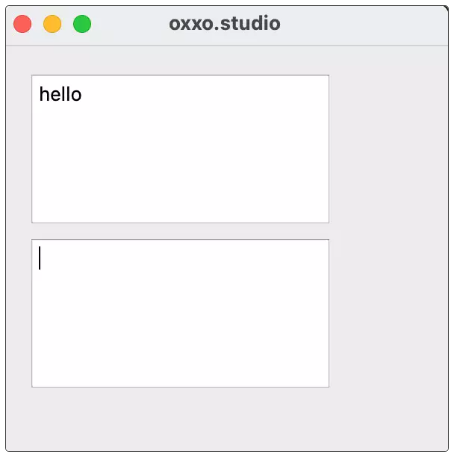

In [ ]:
from PyQt5 import QtWidgets
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 300)

input = QtWidgets.QTextEdit(Form)         # QTextEdit 多行輸入框
input.setGeometry(20,20,200,100)

input_p = QtWidgets.QPlainTextEdit(Form)  # QPlainTextEdit 多行輸入框
input_p.setGeometry(20,130,200,100)

Form.show()
sys.exit(app.exec_())

##### 多行輸入框位置設定 
透過下列方法，可以將 QTextEdit、QPlainTextEdit 元件定位到指定的位置：

|方法|參數|說明|\
|move()|x, y|設定擺放在父元件中的 xy 座標，x 往右為正，y 往下為正，尺寸根據內容自動延伸。|\
|setGeometry()|x, y, w, h|設定擺放在父元件中的 xy 座標和長寬尺寸，x 往右為正，y 往下為正，如果超過長寬尺寸，輸入的文字會被裁切無法顯示。|

下方的程式碼執行後，會放入兩個 QPlainTextEdit，一個使用 move() 定位並使用預設寬度，另外一個使用 setGeometry() 方法定位 ( QTextEdit 的作法完全相同 )。

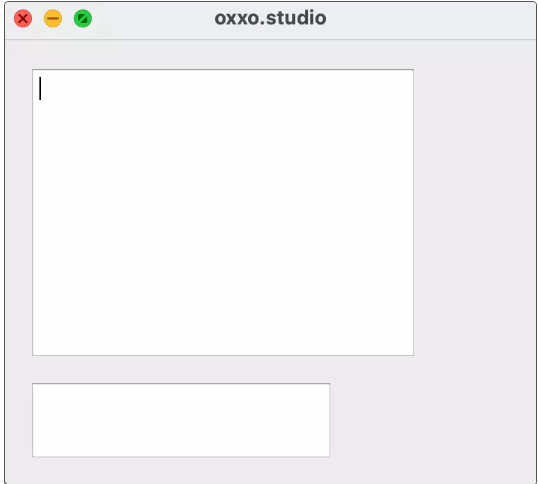

In [ ]:
from PyQt5 import QtWidgets
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(360, 300)

input_1 = QtWidgets.QPlainTextEdit(Form)
input_1.move(20,20)

input_2 = QtWidgets.QPlainTextEdit(Form)
input_2.setGeometry(20,230,200,50)

Form.show()
sys.exit(app.exec_())

##### 多行輸入框樣式設定 
透過 setStyleSheet()，可以使用類似網頁的 CSS 語法設定 PlainTextEdit 樣式，下方的程式碼執行後，當輸入框為焦點時，\
會變成白底藍框紅字的樣式 ( QTextEdit 的作法完全相同 )。

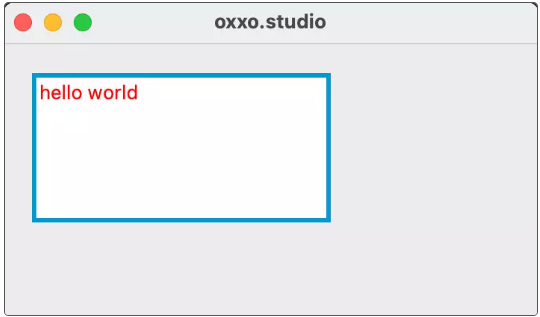

In [ ]:
from PyQt5 import QtWidgets
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(360, 300)

input = QtWidgets.QPlainTextEdit(Form)
input.setGeometry(20,20,200,100)
input.setStyleSheet('''
    QPlainTextEdit {
        border:1px solid #000;
        background:#ccc;
        color:#f00;
    }
    QPlainTextEdit:focus {
        border:3px solid #09c;
        background:#fff;
    }
''')

Form.show()
sys.exit(app.exec_())

##### 多行輸入框常用方法 
下方列出使用多行輸入框的常用方法：

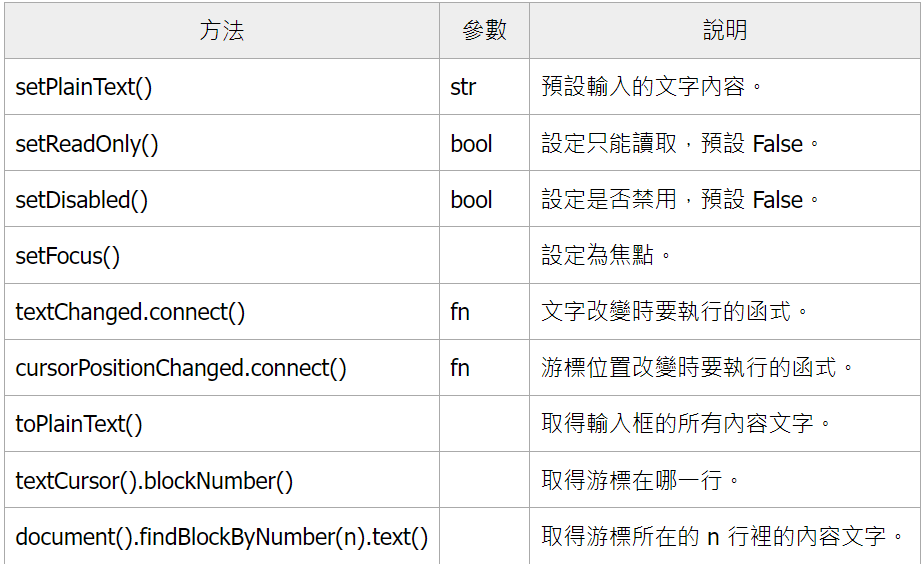

##### 取得多行輸入框內容 
運用 cursorPositionChanged.connect(fn) 方法，就能在輸入框內容的游標位置改變時，執行特定的函式，下方的程式碼執行後，\
當單行輸入框的內容發生改變，就會透過另外一個輸入框，顯示游標所在的那一行的內容。

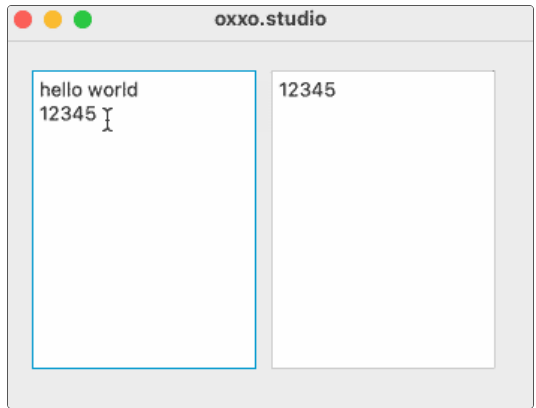

In [ ]:
from PyQt5 import QtWidgets, QtGui,QtCore
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(360, 300)

def show():
    n = input_1.textCursor().blockNumber()                 # 取得所在行數
    text = input_1.document().findBlockByNumber(n).text()  # 取得該行內容
    input_2.setPlainText(text)                             # 另外一個輸入框顯示內容

input_1 = QtWidgets.QPlainTextEdit(Form)
input_1.setGeometry(20,20,150,200)
input_1.setStyleSheet('''
    QPlainTextEdit {
        border:1px solid #000;
    }
    QPlainTextEdit:focus {
        border:3px solid #09c;
    }
''')
input_1.cursorPositionChanged.connect(show)   # 游標改變時，執行 show 函式

input_2 = QtWidgets.QPlainTextEdit(Form)
input_2.setGeometry(180,20,150,200)

Form.show()
sys.exit(app.exec_())

#### 改用 class 的寫法 
上方的程式碼，亦可改用 class 的寫法表示。

##### 主要功能與實現
- **兩個文本編輯區域**：`QPlainTextEdit` 用於創建可編輯的多行文本框。
- **樣式設定**：使用 CSS 來設定文本框的邊框樣式，在焦點狀態下改變邊框。
- **信號與槽連接**：當 `input_1` 的光標位置改變時，`showMsg` 方法被調用，根據光標位置顯示

In [ ]:
# 導入 PyQt5 中的 QtWidgets 模塊和 sys 模塊
from PyQt5 import QtWidgets
import sys

# 定義 MyWidget 類，繼承自 QtWidgets.QWidget
class MyWidget(QtWidgets.QWidget):
    def __init__(self):
        super().__init__()  # 調用 QWidget 的建構函數進行初始化
        self.setWindowTitle('oxxo.studio')  # 設定窗口的標題
        self.resize(360, 300)  # 設定窗口的大小為 360x300 像素
        self.ui()  # 調用 ui 方法來構建用戶界面

    def ui(self):
        # 創建第一個多行文本輸入框
        self.input_1 = QtWidgets.QPlainTextEdit(self)
        self.input_1.setGeometry(20, 20, 150, 200)  # 設置其在窗口中的位置和大小
        # 為第一個文本輸入框設定樣式
        self.input_1.setStyleSheet('''
            QPlainTextEdit {
                border:1px solid #000;  # 默認邊框
            }
            QPlainTextEdit:focus {
                border:3px solid #09c;  # 焦點時邊框
            }
        ''')
        # 連接光標位置改變的信號到 showMsg 方法
        self.input_1.cursorPositionChanged.connect(self.showMsg)

        # 創建第二個多行文本輸入框
        self.input_2 = QtWidgets.QPlainTextEdit(self)
        self.input_2.setGeometry(180, 20, 150, 200)  # 設置其在窗口中的位置和大小

    def showMsg(self):
        # 獲取第一個文本輸入框當前光標所在的塊編號
        n = self.input_1.textCursor().blockNumber()
        # 通過塊編號獲取對應的文本
        text = self.input_1.document().findBlockByNumber(n).text()
        # 將獲得的文本設置到第二個文本輸入框中
        self.input_2.setPlainText(text)

# 程序的入口點
if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)  # 創建 QApplication 類的實例
    Form = MyWidget()  # 創建 MyWidget 類的實例
    Form.show()  # 顯示窗口
    sys.exit(app.exec_())  # 啟動事件循環，等待用戶操作和事件處理